<a href="https://colab.research.google.com/github/jaykakadiya18/Data-Science-Projects/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Stock price predict


In [15]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

In [16]:
#get the stock quote
#collect the data from yahoo finance
df = web.DataReader('AAPL', data_source='yahoo', start='2013-01-01', end='2020-12-11')
#show tech data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,16.926661
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.713015
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.247477
2013-01-07,18.903572,18.400000,18.642857,18.710714,484156400.0,16.151909
2013-01-08,18.996071,18.616072,18.900356,18.761072,458707200.0,16.195379
...,...,...,...,...,...,...
2020-12-04,122.860001,121.519997,122.599998,122.250000,78260400.0,122.250000
2020-12-07,124.570000,122.250000,122.309998,123.750000,86712000.0,123.750000
2020-12-08,124.980003,123.089996,124.370003,124.379997,82225500.0,124.379997


In [17]:
df.shape

(2001, 6)

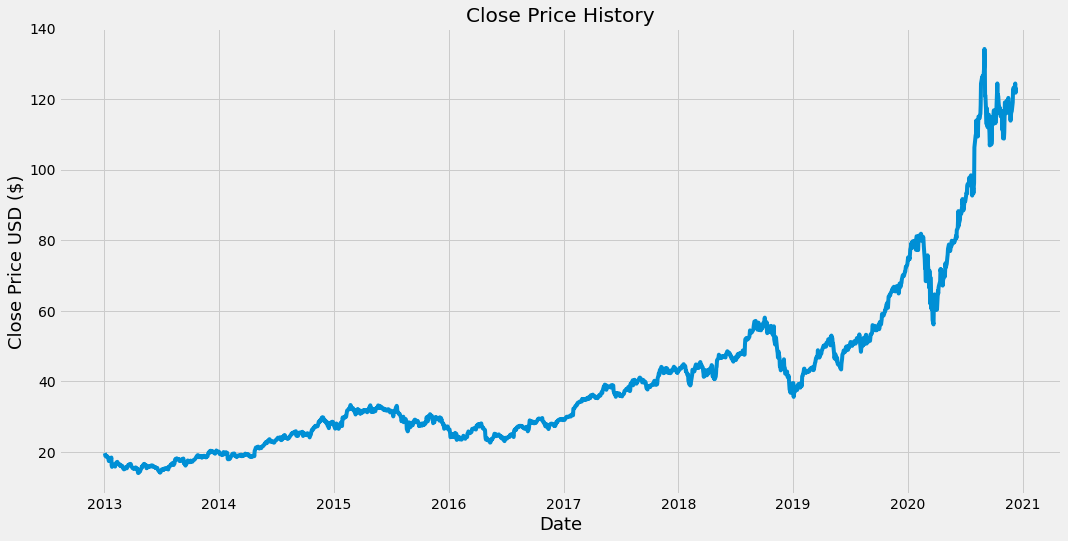

In [18]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [19]:
#create a new datafreame with only the 'Close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#Get the number of row to train the model on
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

1601

In [20]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04708139],
       [0.04502289],
       [0.04053753],
       ...,
       [0.91849129],
       [0.89686653],
       [0.90900966]])

In [21]:
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.04708139, 0.04502289, 0.04053753, 0.0396167 , 0.04003553,
       0.0375968 , 0.03950084, 0.03854735, 0.03303719, 0.02833499,
       0.03432634, 0.03331344, 0.03251736, 0.03393425, 0.03667894,
       0.01781369, 0.0146591 , 0.01761468, 0.02012172, 0.01969399,
       0.01929595, 0.01874047, 0.01538388, 0.019994  , 0.01984845,
       0.02307731, 0.02508533, 0.0265557 , 0.02298226, 0.02271789,
       0.02259313, 0.02068314, 0.02063265, 0.01732358, 0.01649483,
       0.01790578, 0.01552646, 0.01735923, 0.01605223, 0.01511061,
       0.01186392, 0.00876872, 0.01206293, 0.01043514, 0.01189659,
       0.01223522, 0.01406204, 0.01125795, 0.01123418, 0.01246691,
       0.01578192, 0.01936427, 0.0189989 , 0.01828302, 0.0184761 ,
       0.02120297, 0.02169903, 0.02097424, 0.01828302, 0.01548488])]
[0.011400530420072968]

[array([0.04708139, 0.04502289, 0.04053753, 0.0396167 , 0.04003553,
       0.0375968 , 0.03950084, 0.03854735, 0.03303719, 0.02833499,
       0.03432634, 0.03331344, 0.0

In [22]:
#convert to x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1541, 60, 1)

In [24]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1541/1541 [==============================] - 34s 22ms/step - loss: 3.1890e-04


In [27]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [28]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [29]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [30]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [31]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

4.010692088670908

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


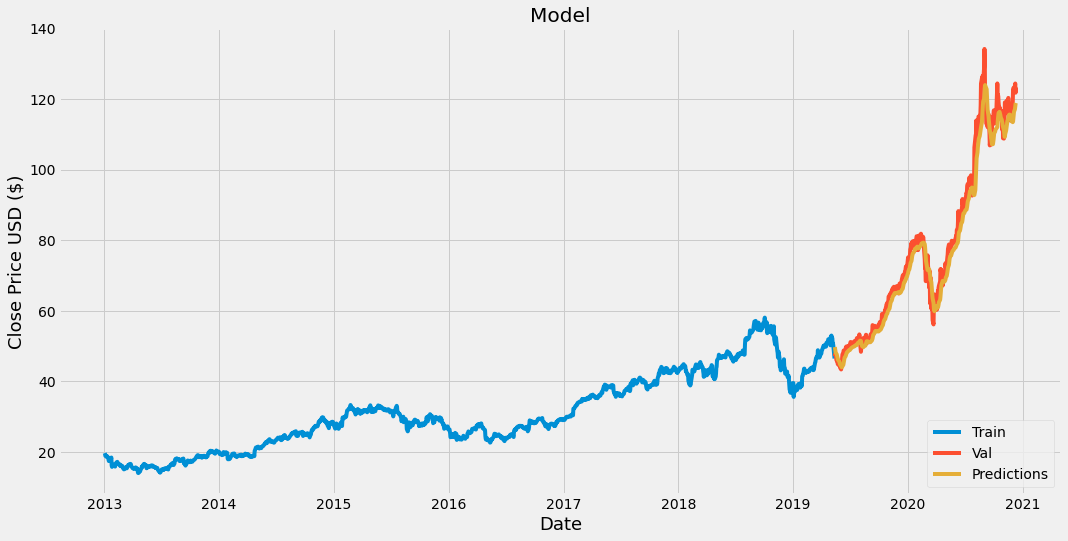

In [32]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-05-14,47.165001,49.669899
2019-05-15,47.730000,48.986740
2019-05-16,47.520000,48.438961
2019-05-17,47.250000,47.994404
2019-05-20,45.772499,47.621910
...,...,...
2020-12-04,122.250000,116.364563
2020-12-07,123.750000,117.115639
2020-12-08,124.379997,117.864319


In [34]:
#Get the quote(Now let’s see what the actual price for that day was.)
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-12-11', end='2020-12-11')
print(apple_quote2['Close'])

Date
2020-12-10    123.239998
Name: Close, dtype: float64
